In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Explained Variance measures how much of the original data's variance is retained by a specific component (in PCA) or how much variability between classes is captured by the components (in LDA).
In PCA, it's used to evaluate the importance of each principal component.
In LDA, it's part of the objective to maximize class separability (between-class variance) and minimize intra-class variance.

In [2]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
dataset.shape

(178, 14)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
dataset.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [7]:
X=dataset.iloc[:, 0:13]

In [8]:
y = dataset.iloc[:, 13]

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
161,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [13]:
# Applying PCA
# n=2 so we optimize 13 input columns 2 input columns using PCA
#UNsupervised learning
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [14]:
explained_variance

array([0.36884109, 0.19318394])

In [15]:
pd.DataFrame(X_train,columns=['PCA 1','PCA 2'])

,PCA 1,PCA 2
0,-2.178845,-1.072185
1,-1.808192,1.578223
2,1.098295,2.221243
3,-2.555847,-1.662104
4,1.856981,0.241573
...,...,...
137,-0.501012,2.684532
138,0.330454,2.433962
139,0.010973,1.995855
140,2.891767,-0.771555


In [16]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



C:\Users\my pc\AppData\Local\Temp\ipykernel_9056\910810724.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


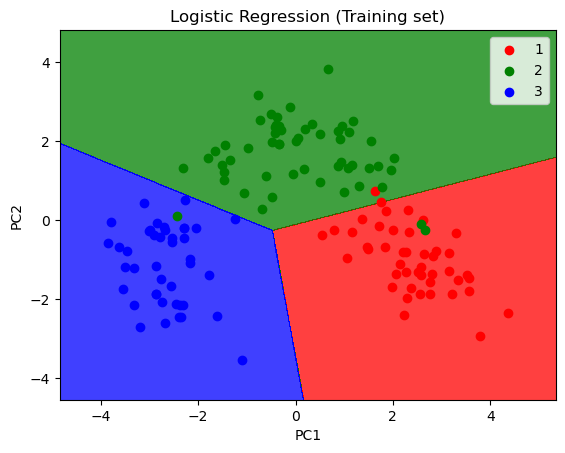

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [21]:
X_set, y_set = X_train, y_train

In [22]:
X_set

array([[-2.17884511e+00, -1.07218467e+00],
       [-1.80819239e+00,  1.57822344e+00],
       [ 1.09829474e+00,  2.22124345e+00],
       [-2.55584748e+00, -1.66210369e+00],
       [ 1.85698063e+00,  2.41573166e-01],
       [ 2.58288576e+00, -1.37668170e+00],
       [ 8.72876119e-01,  2.25618512e+00],
       [-4.18384029e-01,  2.35415681e+00],
       [-3.04977245e-01,  2.27659433e+00],
       [ 2.14082532e+00, -1.10052871e+00],
       [-2.98136465e+00, -2.47159183e-01],
       [ 1.96188242e+00,  1.25407738e+00],
       [-2.16177795e+00, -9.75966550e-01],
       [ 2.21976084e+00, -2.39507167e+00],
       [-2.30179529e+00, -2.05791962e-01],
       [-3.00953827e+00, -2.79141212e-01],
       [ 2.63443473e+00, -8.68313119e-01],
       [-1.09219965e+00, -3.53906625e+00],
       [ 2.62578435e+00, -2.96852840e-03],
       [ 1.98077342e-01,  2.29193443e+00],
       [-2.67442753e+00, -2.58800132e+00],
       [-2.54763698e+00, -4.52703891e-01],
       [ 1.77416736e+00,  8.43586940e-01],
       [-2.

In [23]:
X_train

array([[-2.17884511e+00, -1.07218467e+00],
       [-1.80819239e+00,  1.57822344e+00],
       [ 1.09829474e+00,  2.22124345e+00],
       [-2.55584748e+00, -1.66210369e+00],
       [ 1.85698063e+00,  2.41573166e-01],
       [ 2.58288576e+00, -1.37668170e+00],
       [ 8.72876119e-01,  2.25618512e+00],
       [-4.18384029e-01,  2.35415681e+00],
       [-3.04977245e-01,  2.27659433e+00],
       [ 2.14082532e+00, -1.10052871e+00],
       [-2.98136465e+00, -2.47159183e-01],
       [ 1.96188242e+00,  1.25407738e+00],
       [-2.16177795e+00, -9.75966550e-01],
       [ 2.21976084e+00, -2.39507167e+00],
       [-2.30179529e+00, -2.05791962e-01],
       [-3.00953827e+00, -2.79141212e-01],
       [ 2.63443473e+00, -8.68313119e-01],
       [-1.09219965e+00, -3.53906625e+00],
       [ 2.62578435e+00, -2.96852840e-03],
       [ 1.98077342e-01,  2.29193443e+00],
       [-2.67442753e+00, -2.58800132e+00],
       [-2.54763698e+00, -4.52703891e-01],
       [ 1.77416736e+00,  8.43586940e-01],
       [-2.

In [105]:
# here X_set which has 2 columns/features 0/1, we split them and create a separate array for 0th column based on min and max column values
# and for 1st column based on min and max column values 
z=np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01)
w=np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)

In [106]:
z.min()

-4.844169946131747

In [107]:
pd.DataFrame(z)

,0
0,-4.84417
1,-4.83417
2,-4.82417
3,-4.81417
4,-4.80417
...,...
1015,5.30583
1016,5.31583
1017,5.32583
1018,5.33583


In [49]:
pd.DataFrame(w)

,0
0,-4.539066
1,-4.529066
2,-4.519066
3,-4.509066
4,-4.499066
...,...
930,4.760934
931,4.770934
932,4.780934
933,4.790934


In [50]:
# here X_set which has 2 columns/features 0/1, we split them and create a separate array for 0th column based on min and max column values
# and for 1st column based on min and max column values 
# and assign it to x1 and x2
# where x1 takes array z and saves it row wise to make it a 2d
# and x2 takes array w and saves it column wise to make it 2d , SO THAT BOTH CONTAIN SAME ROWS AND COLUMNS
x1,x2= np.meshgrid(z,w)

In [108]:
x1

array([[-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
         5.33583005,  5.34583005],
       [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
         5.33583005,  5.34583005],
       [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
         5.33583005,  5.34583005],
       ...,
       [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
         5.33583005,  5.34583005],
       [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
         5.33583005,  5.34583005],
       [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
         5.33583005,  5.34583005]])

In [53]:
pd.DataFrame(x1)

,0,1,2,3,4,5,6,7,8,9,...,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019
0,-4.84417,-4.83417,-4.82417,-4.81417,-4.80417,-4.79417,-4.78417,-4.77417,-4.76417,-4.75417,...,5.25583,5.26583,5.27583,5.28583,5.29583,5.30583,5.31583,5.32583,5.33583,5.34583
1,-4.84417,-4.83417,-4.82417,-4.81417,-4.80417,-4.79417,-4.78417,-4.77417,-4.76417,-4.75417,...,5.25583,5.26583,5.27583,5.28583,5.29583,5.30583,5.31583,5.32583,5.33583,5.34583
2,-4.84417,-4.83417,-4.82417,-4.81417,-4.80417,-4.79417,-4.78417,-4.77417,-4.76417,-4.75417,...,5.25583,5.26583,5.27583,5.28583,5.29583,5.30583,5.31583,5.32583,5.33583,5.34583
3,-4.84417,-4.83417,-4.82417,-4.81417,-4.80417,-4.79417,-4.78417,-4.77417,-4.76417,-4.75417,...,5.25583,5.26583,5.27583,5.28583,5.29583,5.30583,5.31583,5.32583,5.33583,5.34583
4,-4.84417,-4.83417,-4.82417,-4.81417,-4.80417,-4.79417,-4.78417,-4.77417,-4.76417,-4.75417,...,5.25583,5.26583,5.27583,5.28583,5.29583,5.30583,5.31583,5.32583,5.33583,5.34583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,-4.84417,-4.83417,-4.82417,-4.81417,-4.80417,-4.79417,-4.78417,-4.77417,-4.76417,-4.75417,...,5.25583,5.26583,5.27583,5.28583,5.29583,5.30583,5.31583,5.32583,5.33583,5.34583
931,-4.84417,-4.83417,-4.82417,-4.81417,-4.80417,-4.79417,-4.78417,-4.77417,-4.76417,-4.75417,...,5.25583,5.26583,5.27583,5.28583,5.29583,5.30583,5.31583,5.32583,5.33583,5.34583
932,-4.84417,-4.83417,-4.82417,-4.81417,-4.80417,-4.79417,-4.78417,-4.77417,-4.76417,-4.75417,...,5.25583,5.26583,5.27583,5.28583,5.29583,5.30583,5.31583,5.32583,5.33583,5.34583
933,-4.84417,-4.83417,-4.82417,-4.81417,-4.80417,-4.79417,-4.78417,-4.77417,-4.76417,-4.75417,...,5.25583,5.26583,5.27583,5.28583,5.29583,5.30583,5.31583,5.32583,5.33583,5.34583


In [54]:
pd.DataFrame(x2)

,0,1,2,3,4,5,6,7,8,9,...,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019
0,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,...,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066
1,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,...,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066,-4.529066
2,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,...,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066,-4.519066
3,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,...,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066,-4.509066
4,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,...,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066,-4.499066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934,...,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934,4.760934
931,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934,...,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934,4.770934
932,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934,...,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934,4.780934
933,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934,...,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934,4.790934


In [65]:
x1.ravel()

array([-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
        5.33583005,  5.34583005])

In [66]:
# IT FLATTENS DATA FROM 2D 935*1020 TO 1D 953700*1
pd.DataFrame(x1.ravel())

,0
0,-4.84417
1,-4.83417
2,-4.82417
3,-4.81417
4,-4.80417
...,...
953695,5.30583
953696,5.31583
953697,5.32583
953698,5.33583


In [67]:
x2.ravel()

array([-4.53906625, -4.53906625, -4.53906625, ...,  4.80093375,
        4.80093375,  4.80093375])

In [109]:
np.array([x1.ravel(),x2.ravel()])

array([[-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
         5.33583005,  5.34583005],
       [-4.53906625, -4.53906625, -4.53906625, ...,  4.80093375,
         4.80093375,  4.80093375]])

In [71]:
pd.DataFrame(np.array([x1.ravel(),x2.ravel()]))

,0,1,2,3,4,5,6,7,8,9,...,953690,953691,953692,953693,953694,953695,953696,953697,953698,953699
0,-4.844170,-4.834170,-4.824170,-4.814170,-4.804170,-4.794170,-4.784170,-4.774170,-4.764170,-4.754170,...,5.255830,5.265830,5.275830,5.285830,5.295830,5.305830,5.315830,5.325830,5.335830,5.345830
1,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,-4.539066,...,4.800934,4.800934,4.800934,4.800934,4.800934,4.800934,4.800934,4.800934,4.800934,4.800934


In [72]:
pd.DataFrame(np.array([x1.ravel(),x2.ravel()])).T

,0,1
0,-4.84417,-4.539066
1,-4.83417,-4.539066
2,-4.82417,-4.539066
3,-4.81417,-4.539066
4,-4.80417,-4.539066
...,...,...
953695,5.30583,4.800934
953696,5.31583,4.800934
953697,5.32583,4.800934
953698,5.33583,4.800934


In [75]:
pd.DataFrame(classifier.predict(np.array([x1.ravel(),x2.ravel()]).T))

,0
0,3
1,3
2,3
3,3
4,3
...,...
953695,2
953696,2
953697,2
953698,2


In [83]:
# UN-RAVELLING THE PREDICTED VALUES TO 935*1020
pd.DataFrame(classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(X1.shape))

,0,1,2,3,4,5,6,7,8,9,...,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019
0,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
1,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
2,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
4,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
931,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
932,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
933,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [85]:
x1, x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(X1.shape)

(array([[-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
          5.33583005,  5.34583005],
        [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
          5.33583005,  5.34583005],
        [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
          5.33583005,  5.34583005],
        ...,
        [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
          5.33583005,  5.34583005],
        [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
          5.33583005,  5.34583005],
        [-4.84416995, -4.83416995, -4.82416995, ...,  5.32583005,
          5.33583005,  5.34583005]]),
 array([[-4.53906625, -4.53906625, -4.53906625, ..., -4.53906625,
         -4.53906625, -4.53906625],
        [-4.52906625, -4.52906625, -4.52906625, ..., -4.52906625,
         -4.52906625, -4.52906625],
        [-4.51906625, -4.51906625, -4.51906625, ..., -4.51906625,
         -4.51906625, -4.51906625],
        ...,
        [ 4.78093375,  4.78093375,  4.78093375, ...,  

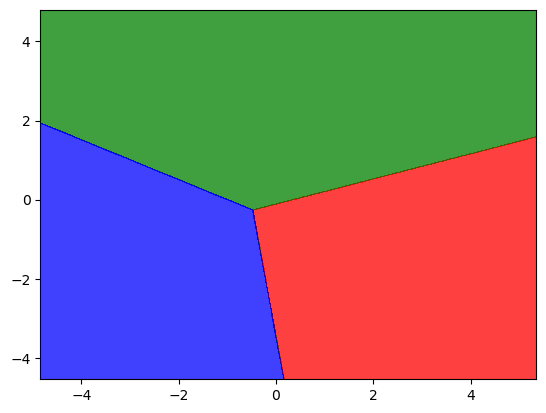

In [87]:
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

(-4.5390662499348995, 4.800933750064901)

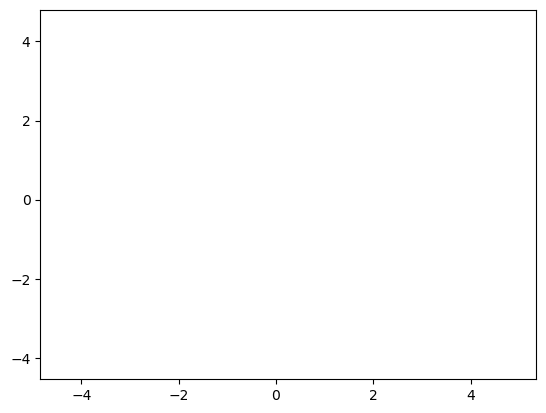

In [88]:
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

C:\Users\my pc\AppData\Local\Temp\ipykernel_9056\2980108261.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


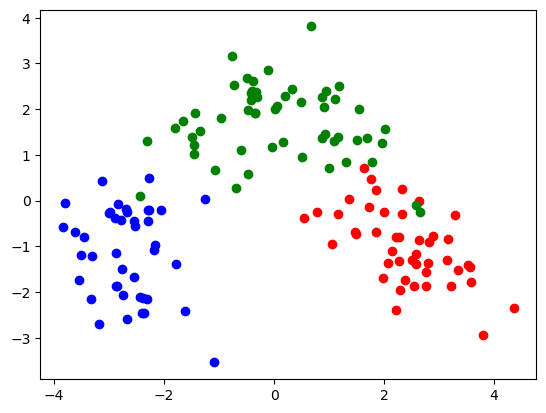

In [101]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

In [102]:
np.unique(y_set)

array([1, 2, 3], dtype=int64)

C:\Users\my pc\AppData\Local\Temp\ipykernel_9056\2989341537.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


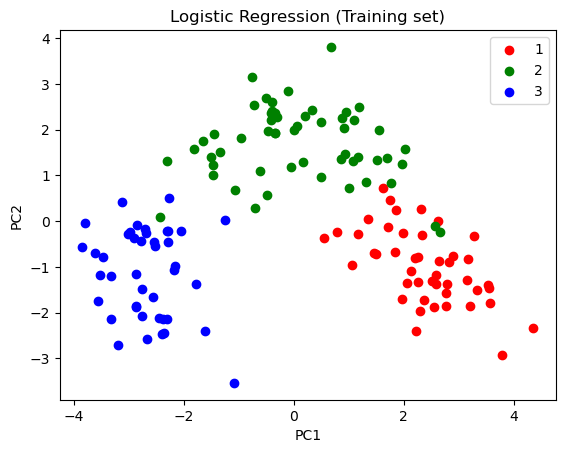

In [103]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

The function plt.contourf in Matplotlib is used to create a filled contour plot. Contour plots are used to visualize three-dimensional data in two dimensions, with contour lines representing different levels of the third dimension (the value of the function). The contourf function fills the areas between these contours, which makes the plot visually clearer and more colorful.
X: 2D array (meshgrid of x-coordinates).
Y: 2D array (meshgrid of y-coordinates).
Z: 2D array of function values at each coordinate pair (i.e., Z = f(X, Y)).
levels (optional): Defines the contour levels, i.e., where the contour lines will appear. If not specified, Matplotlib will automatically calculate the contour levels.
cmap: A colormap for the filled regions (e.g., plt.cm.viridis, ListedColormap).
Common Usage
The plt.contourf function is often used to display decision boundaries in machine learning classification tasks. Here's an example of how it can be used:

C:\Users\my pc\AppData\Local\Temp\ipykernel_9056\2421724687.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


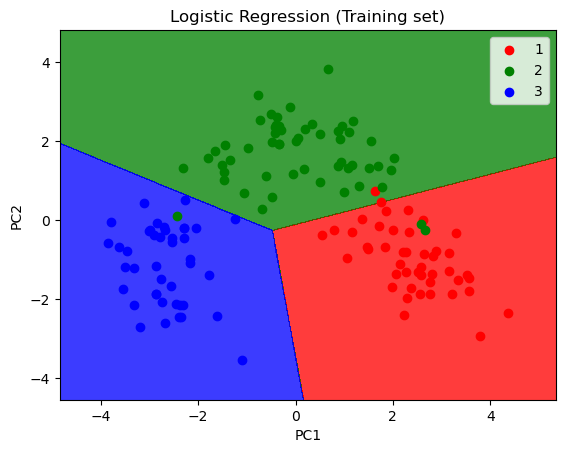

In [130]:
X_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(X1.shape),alpha = 0.05, cmap = ListedColormap(('red', 'green', 'blue')))
# ravel flattens 2D array 935*1020 to 1D array of 953700
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\my pc\AppData\Local\Temp\ipykernel_9056\4191123739.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


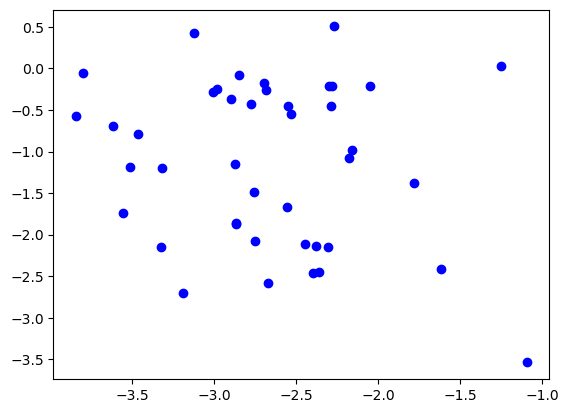

In [126]:
plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

In [115]:
y_set.value_counts()

Customer_Segment
2    55
1    45
3    42
Name: count, dtype: int64

C:\Users\my pc\AppData\Local\Temp\ipykernel_9056\2179181207.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


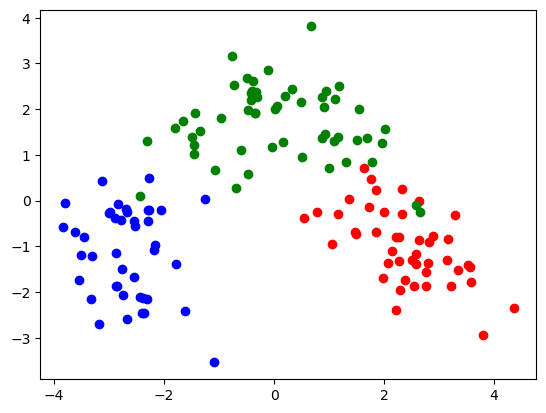

In [118]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

TypeError: scatter() missing 1 required positional argument: 'y'

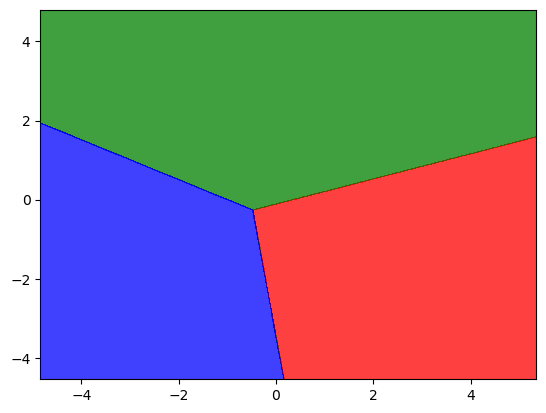

In [120]:
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
# ravel flattens 2D array 935*1020 to 1D array of 953700
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
# KEEPING THIS ERROR TO REMIND THAT WE ARE TREATING 2 INPUT FEATURES AS X AXIS AND Y AXIS FOR THIS PLOT

In [132]:
X_set, y_set = X_train, y_train
z,w =(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(z, w, classifier.predict(np.array([z,w])),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(z.min(), z.max())
plt.ylim(w.min(), w.max())
# ravel flattens 2D array 935*1020 to 1D array of 953700
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.